In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd

try:
    df = pd.read_csv('.\\practice_data\\Loan_default.csv')
    print("data frame head:")
    print(df.head)

    print("\ndataframe info:")
    df.info()

except FileNotFoundError:
    print('파일을 찾을 수 없습니다')

data frame head:
<bound method NDFrame.head of             LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56   85994       50587          520              80   
1       HPSK72WA7R   69   50432      124440          458              15   
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
3       V2KKSFM3UN   32   31713       44799          743               0   
4       EY08JDHTZP   60   20437        9139          633               8   
...            ...  ...     ...         ...          ...             ...   
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  Lo

In [ ]:
file_name = '.\\practice_data\\Loan_default.csv'
df = pd.read_csv(file_name)

In [51]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [52]:
df = df.drop('LoanID',axis=1)

In [53]:
unique_values = df['Education'].unique()
print(unique_values)

["Bachelor's" "Master's" 'High School' 'PhD']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. 서열형 인코딩 (Ordinal Encoding) - 수동 매핑
# 'Education' 컬럼의 고유 값과 순서에 맞게 딕셔너리 생성
education_map = {
    'High School': 0,
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
}

# 딕셔너리를 사용하여 'Education' 컬럼 값 대체
df['Education'] = df['Education'].replace(education_map)

# 3. 원-핫 인코딩 (One-Hot Encoding)
one_hot_cols = [
    'EmploymentType',
    'MaritalStatus',
    'HasMortgage',
    'HasDependents',
    'LoanPurpose',
    'HasCoSigner'
]
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


# 4. 숫자형 변수 스케일링 (Numerical Scaling)
numerical_cols = [
    'Age',
    'Income',
    'LoanAmount',
    'CreditScore',
    'MonthsEmployed',
    'NumCreditLines',
    'InterestRate',
    'LoanTerm',
    'DTIRatio'
]

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 5. 최종 데이터 형태 확인
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

print("전처리 완료된 DataFrame Head:")
print(df_encoded.head())

print("\n전처리 완료된 DataFrame Info:")
df_encoded.info()

print("\n특징(X) 데이터 형태:", X.shape)
print("목표(y) 데이터 형태:", y.shape)

C:\Users\opgrs\AppData\Local\Temp\ipykernel_10700\660641898.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace(education_map)


전처리 완료된 DataFrame Head:
        Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.833990  0.089693   -1.086833    -0.341492        0.590533   
1  1.701221 -0.823021   -0.044309    -0.731666       -1.285731   
2  0.166888  0.043854    0.022715    -0.775718       -0.968209   
3 -0.767053 -1.303452   -1.168538     1.061875       -1.718715   
4  1.100830 -1.592855   -1.671921     0.369631       -1.487790   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  ...  \
0        1.341937      0.261771 -0.001526 -0.260753          1  ...   
1       -1.343791     -1.308350  1.412793  0.778585          2  ...   
2        0.446694      1.156831 -0.708685 -0.823728          2  ...   
3        0.446694     -0.967805 -0.708685 -1.170174          0  ...   
4        1.341937     -1.052188  0.705634  0.995114          1  ...   

   EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
0                      False                  False                 False  

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기 및 전처리 (이전 단계에서 완료한 모든 과정)
file_name = '.\\practice_data\\Loan_default.csv'
df = pd.read_csv(file_name)
df = df.drop('LoanID', axis=1)

education_map = {
    'High School': 0,
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
}
df['Education'] = df['Education'].replace(education_map)

one_hot_cols = [
    'EmploymentType',
    'MaritalStatus',
    'HasMortgage',
    'HasDependents',
    'LoanPurpose',
    'HasCoSigner'
]
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

numerical_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'
]
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 특징(X)과 목표(y) 변수 분리
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

# 1. 데이터를 학습용(Training)과 테스트용(Test)으로 분할
# test_size=0.2는 전체 데이터의 20%를 테스트용으로 사용하겠다는 의미입니다.
# random_state는 코드를 다시 실행해도 동일한 결과를 얻기 위해 설정합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("데이터 분할 완료:")
print(f"학습용 데이터셋: {X_train.shape[0]}개")
print(f"테스트용 데이터셋: {X_test.shape[0]}개")

# 2. 로지스틱 회귀 모델 학습 및 평가
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

print("\n로지스틱 회귀 모델 정확도:", f"{log_reg_accuracy:.4f}")

# 3. 랜덤 포레스트 모델 학습 및 평가
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("랜덤 포레스트 모델 정확도:", f"{rf_accuracy:.4f}")


C:\Users\opgrs\AppData\Local\Temp\ipykernel_10700\2448397791.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace(education_map)


데이터 분할 완료:
학습용 데이터셋: 204277개
테스트용 데이터셋: 51070개

로지스틱 회귀 모델 정확도: 0.8858
랜덤 포레스트 모델 정확도: 0.8864


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

file_name = '.\\practice_data\\Loan_default.csv'
df = pd.read_csv(file_name)
df = df.drop('LoanID', axis = 1)

education_map = {
    'High School': 0,
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
}

df['Education'] = df['Education'].replace(education_map)

one_hot_cols = [
    'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
    'LoanPurpose', 'HasCoSigner'
]
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

numerical_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'
]
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


# 특징(X)과 목표(y) 변수 분리
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']

# 1. 데이터를 학습용(Training)과 테스트용(Test)으로 분할
# test_size=0.2는 전체 데이터의 20%를 테스트용으로 사용하겠다는 의미입니다.
# random_state는 코드를 다시 실행해도 동일한 결과를 얻기 위해 설정합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\opgrs\AppData\Local\Temp\ipykernel_10700\406824671.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace(education_map)


In [64]:
# 로지스틱스 회귀 모델 학습 및 예측
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train,y_train)
log_reg_pred = log_reg_model.predict(X_test)

# 로지스틱스 회귀 모델 성능 분석
print("="*50)
print('로지스틱스 회귀 모델 성능 분석')
print("="*50)
print('혼동행렬:')
print(confusion_matrix(y_test, log_reg_pred))
print("\n분류 리포트:")
print(classification_report(y_test, log_reg_pred))

로지스틱스 회귀 모델 성능 분석
혼동행렬:
[[45047   123]
 [ 5710   190]]

분류 리포트:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



In [65]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

print("="*50)
print("랜덤 포레스트 모델 성능 분석")
print("="*50)
print("혼동 행렬:")
print(confusion_matrix(y_test, rf_pred))
print("\n분류 리포트:")
print(classification_report(y_test, rf_pred))

랜덤 포레스트 모델 성능 분석
혼동 행렬:
[[45065   105]
 [ 5694   206]]

분류 리포트:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.03      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.52      0.50     51070
weighted avg       0.86      0.89      0.84     51070



In [66]:
%pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-l

In [70]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_name = '.\\practice_data\\Loan_default.csv'
df= pd.read_csv(file_name)
df = df.drop('LoanID', axis=1)

education_map = {
    'High School': 0,
    "Bachelor's": 1,
    "Master's": 2,
    'PhD': 3
}
df['Education']=df['Education'].replace(education_map)

one_hot_cols = [
    'EmploymentType','MaritalStatus','HasMortgage','HasDependents',
    'LoanPurpose','HasCoSigner'
]
df_encoded = pd.get_dummies(df,columns=one_hot_cols,drop_first=True)

numerical_cols = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
    'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'
]
scaler = StandardScaler()
df_encoded[numerical_cols]=scaler.fit_transform(df_encoded[numerical_cols])

X = df_encoded.drop('Default',axis=1)
y = df_encoded['Default']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#SMOTE 적용 전 데이터 크기 확인]
print("SMOTE 적용 전 학습용 데이터셋:")
print(f"클래스 0(정상상환):{y_train.value_counts()[0]}")
print(f"클래스 1(연체):{y_train.value_counts()[1]}")
print("비율:",y_train.value_counts()[1] / y_train.value_counts()[0])

#SMOTE 객체 생성
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

# SMOTE 적용 후 데이터 크기 확인
print("\nSMOTE 적용 후 학습용 데이터셋:")
print(f"클래스 0 (정상 상환): {y_train_resampled.value_counts()[0]}개")
print(f"클래스 1 (연체): {y_train_resampled.value_counts()[1]}개")
print("비율:", y_train_resampled.value_counts()[1] / y_train_resampled.value_counts()[0])

C:\Users\opgrs\AppData\Local\Temp\ipykernel_10700\1438499469.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education']=df['Education'].replace(education_map)


SMOTE 적용 전 학습용 데이터셋:
클래스 0(정상상환):180524
클래스 1(연체):23753
비율: 0.13157807272163258

SMOTE 적용 후 학습용 데이터셋:
클래스 0 (정상 상환): 180524개
클래스 1 (연체): 180524개
비율: 1.0


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)

print("\n모델훈련을 시작합니다")
model.fit(X_train_resampled, y_train_resampled)
print("모델휸련이 완료되었습니다")


모델훈련을 시작합니다
모델휸련이 완료되었습니다


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# 3. 모델 예측
# !!매우 중요!!: 평가할 때는 원본 테스트 데이터(X_test)를 사용합니다.
print("\n테스트 데이터로 예측을 수행합니다...")
y_pred = model.predict(X_test)
print("예측이 완료되었습니다.")


# 4. 모델 성능 평가
print("\n--- 모델 성능 평가 ---")
print(f"정확도(Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"정밀도(Precision): {precision_score(y_test, y_pred):.4f}")
print(f"재현율(Recall): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")

print("\n[ Confusion Matrix ]")
print(confusion_matrix(y_test, y_pred))

print("\n[ Classification Report ]")
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'Default (1)']))


테스트 데이터로 예측을 수행합니다...
예측이 완료되었습니다.

--- 모델 성능 평가 ---
정확도(Accuracy): 0.8548
정밀도(Precision): 0.3339
재현율(Recall): 0.2578
F1-Score: 0.2910
ROC AUC: 0.7283

[ Confusion Matrix ]
[[42136  3034]
 [ 4379  1521]]

[ Classification Report ]
              precision    recall  f1-score   support

  Normal (0)       0.91      0.93      0.92     45170
 Default (1)       0.33      0.26      0.29      5900

    accuracy                           0.85     51070
   macro avg       0.62      0.60      0.61     51070
weighted avg       0.84      0.85      0.85     51070



In [78]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


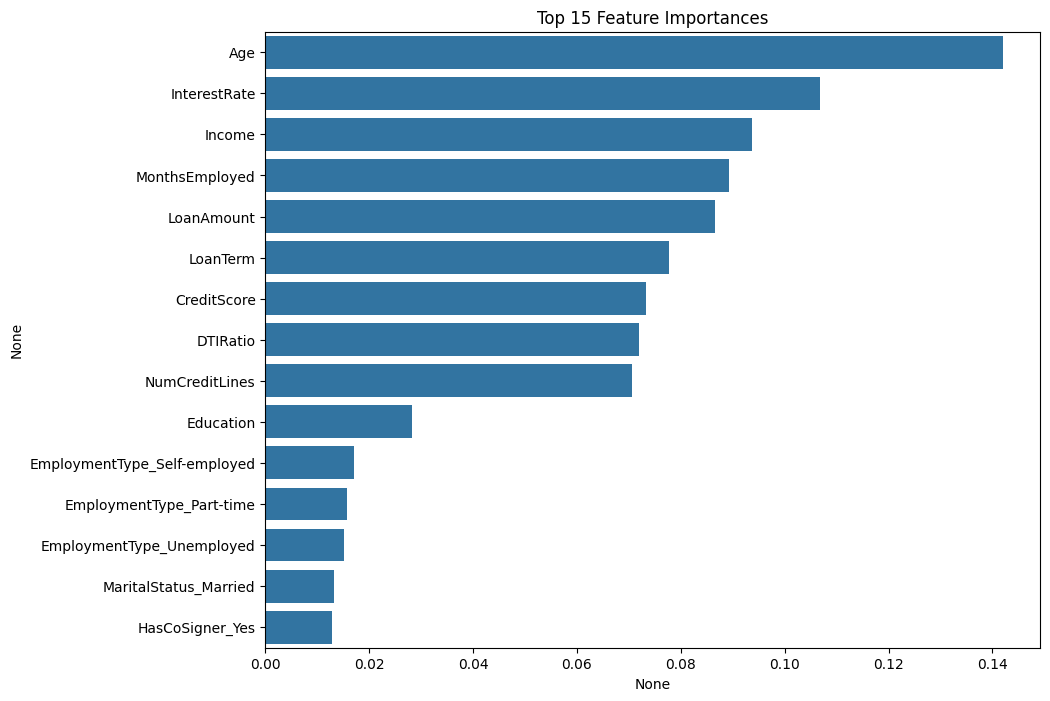

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 확인
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.nlargest(15), y=feature_importances.nlargest(15).index)
plt.title('Top 15 Feature Importances')
plt.show()


In [ ]:
df = 